# Разработка, за которую мне премию вот такую дадут

Теоретическое исследвание возможности выигрыша во "французскую рулетку"


Материал из Википедии — свободной энциклопедии:

Французская рулетка — азартная игра, основанная на везении игрока в угадывании выпавшего номера. Считается прародительницей американской и европейской рулеток.

Правила: 

Игра осуществляется по принципу игрок против казино. Диск разделен на 37 секторов, пронумерованных от 0 до 36. Сектора с 1 по 36 распределены в строго определенном порядке и последовательно окрашены в красный и чёрный цвета. Сектор 0 (зеро) окрашен в зелёный цвет. Для терминов и обозначений используется только французский язык.

Перед началом игры каждый игрок делает ставку, то есть выбирает число или комбинацию чисел. Во французской рулетке существует 10 видов основных ставок. Внутренние: сделанные на одно, два, три, четыре и шесть чисел. Этот вид ставок называется внутренним, потому что фишки ставятся непосредственно на клетки игрового поля, обозначенные цифрами. Второй вид ставок — это внешние ставки, называемые так, потому что места для ставок находятся сбоку от клеток с цифрами. К ним относятся ставка на столбец (12 чисел), на дюжину (12 чисел), ставка на цвет сектора (18 чисел), на чет или нечет выпавшего числа (18 чисел) и на величину числа (18 чисел). Есть ещё так называемые устные ставки, то есть это такой вид ставок, которые обусловлены расположением чисел на самой рулетке, а не на игровом столе.

Со стороны казино в игре участвует дилер, который раскручивает рулетку и запускает с неё маленький шарик. По мере замедления вращения диска шарик, после многих отскоков, попадает в одну из лунок, сделанных в каждом секторе. Если игрок, делая ставку, угадал номер сектора, то он выиграл. В случае если выпал 0 (зеро) все сделанные ставки уходят в пользу казино.

Соотношение возможного выигрыша к ставке зависит от типа сделанной ставки. Самый крупный выигрыш получается при ставке на одно число и выражается соотношением 35:1, а самое маленькое соотношение будет в случае внешних ставок: 2:1 и 1:1. Но чем меньше это соотношение, тем выше вероятность выигрыша.




Это выдержка из Википедии, а теперь перейдем к математике. Начнем с обоснования выплат за "победу". В базовой составляющей их существует 10. Ниже представлена таблица ставок с выплатами в фишках, при ставке в 1 фишку

In [1]:
import pandas as pd
import numpy as np

i = ['bet', 'bet_rus', 'pay']
d = [
['Straight up', 'Один номер', 35],
['Split Bet', 'Два номера', 17],
['Street Bet', 'Три номера', 11],
['Corner', 'Четыре номера', 8],
['Line Bet', 'Шесть номеров', 5],
['Column', 'Колонка', 2],
['Dozen', 'Дюжина', 2],
['Red/Black', 'Красное/Черное', 1],
['Even/Odd', 'Чет/Нечет', 1],
['Low/High', 'Большие/Малые', 1]]

d2 = [['Zero Spiel', 'Игра на зеро'],
['Viosins du zero', 'Большая серия'],
['Orphelins', 'Сирота'],
['Tier du cylindre', 'Малая серия',]
]

df =  pd.DataFrame(data=d, columns=i)
    
df
    


,bet,bet_rus,pay
0,Straight up,Один номер,35
1,Split Bet,Два номера,17
2,Street Bet,Три номера,11
3,Corner,Четыре номера,8
4,Line Bet,Шесть номеров,5
5,Column,Колонка,2
6,Dozen,Дюжина,2
7,Red/Black,Красное/Черное,1
8,Even/Odd,Чет/Нечет,1
9,Low/High,Большие/Малые,1


Далее рассчитаем вероятность победы ставки, при прочих равных. Здесь и далее я, отталкиваясь от своего оыта работы в казино, принимаю шансы выпадения каждого номера на рулетке равными. Дилер не мухлюет, шарик не магнитный, колесо сбалансировано. 
Каждый новый бросок никак не свзан с предыдущим. Все события независимые. Добавим дополнительную колонку "Вероятности", но перед этим обозначим количество "победных" позиций в каждой ставке

In [2]:
df['quantity']=[1,2,3,4,6,12,12,18,18,18]
df

,bet,bet_rus,pay,quantity
0,Straight up,Один номер,35,1
1,Split Bet,Два номера,17,2
2,Street Bet,Три номера,11,3
3,Corner,Четыре номера,8,4
4,Line Bet,Шесть номеров,5,6
5,Column,Колонка,2,12
6,Dozen,Дюжина,2,12
7,Red/Black,Красное/Черное,1,18
8,Even/Odd,Чет/Нечет,1,18
9,Low/High,Большие/Малые,1,18


Вот сейчас мы можем наглядно рассчитать вероятность "выигрыша" каждой ставки. В нашем случае вероятностью выигрыша ставки будет равнятся отношению количества победных номеров к общему количеству номеров, а именно 1 к 37 ил 1/37

In [3]:
df['probability+'] = df['quantity']/37

df

,bet,bet_rus,pay,quantity,probability+
0,Straight up,Один номер,35,1,0.027027
1,Split Bet,Два номера,17,2,0.054054
2,Street Bet,Три номера,11,3,0.081081
3,Corner,Четыре номера,8,4,0.108108
4,Line Bet,Шесть номеров,5,6,0.162162
5,Column,Колонка,2,12,0.324324
6,Dozen,Дюжина,2,12,0.324324
7,Red/Black,Красное/Черное,1,18,0.486486
8,Even/Odd,Чет/Нечет,1,18,0.486486
9,Low/High,Большие/Малые,1,18,0.486486


Мы посчитали вероятность выигрыша, давайте посчитаем вероятность проигрыша для каждой из ставок. Эта величиа будет равна отношению разницы между общим количеством номеров и победных к общему количеству номеров, иначе говоря, сколько из возможных цифр на рулетке смогут принести поражение игроку:

In [4]:
df['probability-'] = (37-df['quantity'])/37

df

,bet,bet_rus,pay,quantity,probability+,probability-
0,Straight up,Один номер,35,1,0.027027,0.972973
1,Split Bet,Два номера,17,2,0.054054,0.945946
2,Street Bet,Три номера,11,3,0.081081,0.918919
3,Corner,Четыре номера,8,4,0.108108,0.891892
4,Line Bet,Шесть номеров,5,6,0.162162,0.837838
5,Column,Колонка,2,12,0.324324,0.675676
6,Dozen,Дюжина,2,12,0.324324,0.675676
7,Red/Black,Красное/Черное,1,18,0.486486,0.513514
8,Even/Odd,Чет/Нечет,1,18,0.486486,0.513514
9,Low/High,Большие/Малые,1,18,0.486486,0.513514


А вот это, для неподготовленного ума может стать сюрпризом. Вероятности "выигрыша" при разных ставках разнятся? Однако делать поспешные выводы еще слишком рано. 

Далее, для каждой отдельной ставки будет просчитано математическое ожидание.

Математическое ожидание показывает, вокруг какого значения распределена случайная величина, и, по закону больших чисел, к какому значению она будет в среднем стремиться при повторениях эксперимента, попросту говоря, при огромном количестве повторений бросков, к какой "цифре" будет стремиться наш "выигрыш"

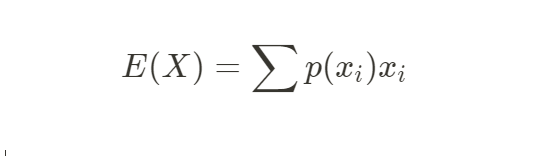

Математическое ожидание случайной величины — сумма всех значений случайной величины, помноженных на их вероятности
Если расшфровать, то получится (победа * вероятность победы + проигрыш * вероятность проигрыша) 
Значение победы будет равнятся указанному в столбце "pay" + 1 оставшаяся ставка на поле
Значение проигрыша - ноль, потому как при проигрыше мы теряем все фишки, поэтому вероятность нас не интересует
Отсюда получаем значение ev равное ("pay" + 1) * "probability"



In [5]:
df['ev'] = (df['pay']+1)*df['probability+']
df


,bet,bet_rus,pay,quantity,probability+,probability-,ev
0,Straight up,Один номер,35,1,0.027027,0.972973,0.972973
1,Split Bet,Два номера,17,2,0.054054,0.945946,0.972973
2,Street Bet,Три номера,11,3,0.081081,0.918919,0.972973
3,Corner,Четыре номера,8,4,0.108108,0.891892,0.972973
4,Line Bet,Шесть номеров,5,6,0.162162,0.837838,0.972973
5,Column,Колонка,2,12,0.324324,0.675676,0.972973
6,Dozen,Дюжина,2,12,0.324324,0.675676,0.972973
7,Red/Black,Красное/Черное,1,18,0.486486,0.513514,0.972973
8,Even/Odd,Чет/Нечет,1,18,0.486486,0.513514,0.972973
9,Low/High,Большие/Малые,1,18,0.486486,0.513514,0.972973



0.972973 или 97,297% - математическое ожидание игрока при игре в рулетку

2,703% - математическое ожидание казино при игре в рулетку, находится разницей между 100% и математическим ожиданием игрока
По чистой случайности МО казино совпало с вероятностью выпадения "Одного номера". Все дело в "дополнительном "Zero" - если его убрать вся игра потеряет математическую привлекательность для казино и станет похожа на подбрасывание монетки, в которой шансы на победу будут равны, но сейчас не об этом. Сейчас о разнице в цифрах

Очевиден перевес в ожидании игрока, скажете Вы. И будете не правы. Все дело в том, что фишка, на которую вы играете для казино не стоит ничего, ну за исключением самого пластика, а для игрока каждая фишка стоит "номинала" этой фишки. А это значит, что вся игра продолжается на деньги игока. И все математические ожидания в этои игре касаются только денег игрока.

А так как математическое ожидание игрока при игре в рулетку меньше единицы, это означает лишь одно, каждая ставка, вне зависимости, приносит ли она выигрыш игроку, либо нет, в долгосрочной перспективе является проигрышем.

Я искренне надеюсь, что это понятно всем. Информацию, представленную выше можно, не без труда, найти в интернете. Я же предлагаю Вам окункуться глубже, в возможность выиграть у казино. 

До сих пор не верите?

In [6]:
df['ev_kb'] = (df['pay']+1)*df['probability+']+0.1*df['probability-']
df

,bet,bet_rus,pay,quantity,probability+,probability-,ev,ev_kb
0,Straight up,Один номер,35,1,0.027027,0.972973,0.972973,1.070270
1,Split Bet,Два номера,17,2,0.054054,0.945946,0.972973,1.067568
2,Street Bet,Три номера,11,3,0.081081,0.918919,0.972973,1.064865
3,Corner,Четыре номера,8,4,0.108108,0.891892,0.972973,1.062162
4,Line Bet,Шесть номеров,5,6,0.162162,0.837838,0.972973,1.056757
5,Column,Колонка,2,12,0.324324,0.675676,0.972973,1.040541
6,Dozen,Дюжина,2,12,0.324324,0.675676,0.972973,1.040541
7,Red/Black,Красное/Черное,1,18,0.486486,0.513514,0.972973,1.024324
8,Even/Odd,Чет/Нечет,1,18,0.486486,0.513514,0.972973,1.024324
9,Low/High,Большие/Малые,1,18,0.486486,0.513514,0.972973,1.024324


In [7]:
df['variation_kb'] = df['probability+']*((df['pay']+1)**2) + (df['probability-']**2)*0.1 - df['ev_kb']*df['ev_kb'] 
df

,bet,bet_rus,pay,quantity,probability+,probability-,ev,ev_kb,variation_kb
0,Straight up,Один номер,35,1,0.027027,0.972973,0.972973,1.070270,33.976216
1,Split Bet,Два номера,17,2,0.054054,0.945946,0.972973,1.067568,16.463294
2,Street Bet,Три номера,11,3,0.081081,0.918919,0.972973,1.064865,10.626180
3,Corner,Четыре номера,8,4,0.108108,0.891892,0.972973,1.062162,7.708115
4,Line Bet,Шесть номеров,5,6,0.162162,0.837838,0.972973,1.056757,4.791300
5,Column,Колонка,2,12,0.324324,0.675676,0.972973,1.040541,1.881848
6,Dozen,Дюжина,2,12,0.324324,0.675676,0.972973,1.040541,1.881848
7,Red/Black,Красное/Черное,1,18,0.486486,0.513514,0.972973,1.024324,0.923075
8,Even/Odd,Чет/Нечет,1,18,0.486486,0.513514,0.972973,1.024324,0.923075
9,Low/High,Большие/Малые,1,18,0.486486,0.513514,0.972973,1.024324,0.923075


In [8]:
df['dev'] = df['variation_kb']**0.5
df

,bet,bet_rus,pay,quantity,probability+,probability-,ev,ev_kb,variation_kb,dev
0,Straight up,Один номер,35,1,0.027027,0.972973,0.972973,1.070270,33.976216,5.828912
1,Split Bet,Два номера,17,2,0.054054,0.945946,0.972973,1.067568,16.463294,4.057499
2,Street Bet,Три номера,11,3,0.081081,0.918919,0.972973,1.064865,10.626180,3.259782
3,Corner,Четыре номера,8,4,0.108108,0.891892,0.972973,1.062162,7.708115,2.776349
4,Line Bet,Шесть номеров,5,6,0.162162,0.837838,0.972973,1.056757,4.791300,2.188904
5,Column,Колонка,2,12,0.324324,0.675676,0.972973,1.040541,1.881848,1.371805
6,Dozen,Дюжина,2,12,0.324324,0.675676,0.972973,1.040541,1.881848,1.371805
7,Red/Black,Красное/Черное,1,18,0.486486,0.513514,0.972973,1.024324,0.923075,0.960768
8,Even/Odd,Чет/Нечет,1,18,0.486486,0.513514,0.972973,1.024324,0.923075,0.960768
9,Low/High,Большие/Малые,1,18,0.486486,0.513514,0.972973,1.024324,0.923075,0.960768


In [10]:
from scipy import stats as st
distr = st.norm(1000, 100) 

x = 1

result = distr.ppf(x) # считаем вероятность получить значение x 
print(result) 

inf


Но, ведь, казино тоже проигрывает, известны случаи, когда игроки на рулетке "поднимали" неплохие суммы. Их знает каждый, у Вас есть друг мужа маминой подруги, сестра двоюродного брата по маме, сын соседа с дачи. У каждого есть история про какого-то знакомого. Я сам, лично, видел не раз, как на рулетке побеждали, однако статистика, на стороне казино. Однако сейчас мы обсуждаем именно возможное событие, которым является победа игрока. А случается это по одной простой причине - дисперсия (Диспе́рсия случа́йной величины́ — мера разброса значений случайной величины относительно её математического ожидания)

Надеюсь, пока не сложно. Дальше будет веселее, уж поверьте

Поскольку мы уже знаем математическое ожидание, можно найти и меру разброса этой величины, а именно дисперсию.
Для этого нужно найти математическое ожидание квадрата случайной величины. Это несложно, ведь значения меняются, а их вероятности — нет.
Зная математическое ожидание самой случайной величины и её квадрата, дисперсию находят по формуле:

![image.png](attachment:image.png)


Чтобы на этом месте не потерять читателей, поясню. 
Дисперсия будет считатсья как = разницей между суммой квадратов вероятностей исхода и квадтата математического ожиданий
Еще проще: в каждом броске шарика 2 варианта - победа казино или победа игрока, но с разной вероятностью. Эти два исхода, с возведенной в квадрат вероятностью мы и будем складывать, а после отнимать математическое ожидание в квадрате, которое посчитали уже до этого. Но так как победа казино для игрока является 0 фишек, вторая часть первого слагаемого съедается:

("probability + " * ("pay" + 1) * ("pay" + 1)) + ("probability -" * (0) * (0)) - "ev" * "ev"

Dx = 1/37*36^2 + 35/36*0^2 - (36/37)^2

In [9]:
df['variation'] = df['probability +']*(df['pay']+1)*(df['pay']+1) - df['ev']*df['ev']
df

KeyError: 'probability +'







	два номера	17:1	38:2	2	36	34 руб	36 руб	2 руб	0.0526
	три номера	11:1	38:3	3	35	33 руб	35 руб	2 руб	0.0526
	четыре номера	8:1	38:4	4	34	32 руб	34 руб	2 руб	0.0526
	пять номеров	6:1	38:5	5	33	30 руб	33 руб	3 руб	0.0789
	шесть номеров	5:1	38:6	6	32	30 руб	32 руб	2 руб	0.0526
Внешние ставки
	двенадцать номеров	2:1	38:12	12	26	24 руб	26 руб	2 руб	0.0526
	двенадцать номеров	2:1	38:12	12	26	24 руб	26 руб	3 руб	0.0526
Red or Black	одинадцать номеров	1:1	38:18	18	20	18 руб	20 руб	2 руб	0.0526
Even or Odd	восемнадцать	1:1	38:18	18	20	18 руб	20 руб	2 руб	0.0526
Low or High